## Problem with data set having a large number of features

    Have you ever worked on a dataset with more than a thousand features? How about over 50,000 features? I have, and let me tell you it’s a very challenging task, especially if you don’t know where to start! Having a high number of variables is both a boon and a curse. It’s great that we have loads of data for analysis, but it is challenging due to size.

    It’s not feasible to analyze each and every variable at a microscopic level. It might take us days or months to perform any meaningful analysis and we’ll lose a ton of time and money for our business! Not to mention the amount of computational power this will take. We need a better way to deal with high dimensional data so that we can quickly extract patterns and insights from it. So how do we approach such a dataset? 
    
    

    Here comes the concept of dimensionality reduction. Using dimensionality reduction techniques, of course. You can use this concept to reduce the number of features in your dataset without having to lose much information and keep (or improve) the model’s performance. It’s a really powerful way to deal with huge datasets,

## Need of Dimensionality Reduction

    Here are some of the benefits of applying dimensionality reduction to a dataset:

    *Space required to store the data is reduced as the number of dimensions comes down
    
    *Less dimensions lead to less computation/training time
    
    *Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
    
    *It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
    
    *It helps in visualizing data. It is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly


## 1. PCA

    Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

    Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

    One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels)

### Implementation :

#### Data set used
    One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

#### Download and Load the Data

In [20]:
from sklearn import datasets

# The digits dataset
mnist = datasets.load_digits()

#mnist = fetch_mldata('MNIST original')

    The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).

    The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

#### Split Data into Training and Test Sets

    Typically the train test split is 80% training and 20% test. In this case, I chose 6/7th of the data to be training and 1/7th of the data to be in the test set.

In [21]:
from sklearn.model_selection import train_test_split# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#### Standardize the Data

    PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(train_img)# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

#### Import and Apply PCA
    Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [23]:
train_img.shape

(1540, 64)

In [24]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(10)

    Fit PCA on training set. Note: you are fitting PCA on the training set only.


In [25]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

    Note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 330 principal components.


#### Apply the mapping (transform) to both the training set and the test set.

In [26]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)
train_img.shape

(1540, 10)

In [37]:
pca.explained_variance_ratio_.sum()

0.5895828701133894

#### Apply Logistic Regression to the Transformed Data

    Step 1: Import the model you want to use

    In sklearn, all machine learning models are implemented as Python classes

In [27]:
from sklearn.linear_model import LogisticRegression

#### Step 2: Make an instance of the Model.

In [28]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=500)

#### Step 3: Training the model on the data, storing the information learned from the data

    Model is learning the relationship between digits and labels

In [29]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\bms\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Step 4: Predict the labels of new data (new images)

    Uses the information the model learned during the model training process

    The code below predicts for one observation

In [30]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([2])

#### Step 5: Measuring Model Performance

    While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.



In [31]:
logisticRegr.score(test_img, test_lbl)

0.8793774319066148

## 2.SVD

    Singular Value Decomposition, or SVD, has a wide array of applications. These include dimensionality reduction, image compression, and denoising data. In essence, SVD states that a matrix can be represented as the product of three other matrices. In mathematical terms, SVD can be written as follows:
  ![alt text](svd.png "Title")

    where n is the number of rows (i.e. samples) and p represents the number of dimensions.

### Implementation
    Let’s take a look at how we could go about applying Singular Value Decomposition in Python. To begin, import the following libraries. We are using the same data , that we used for PCA

In [32]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.tree import DecisionTreeClassifier


In [33]:
X, y = load_digits(return_X_y=True)

    Let’s take a look at the first digit. As we can see, it’s simply an array of length 64 containing the pixel intensities.
    If we want to view the image using matplotlib, we must first reshape the array.

In [34]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

    Next, we’ll use Singular Value Decomposition to see whether we are able to reconstruct the image using only 2 features for each row. The s matrix returned by the function must be converted into a diagonal matrix using the diag method. By default, diag will create a matrix that is n x n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

In [35]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
VT = V[:n_component, :]
A = U.dot(S.dot(VT))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


In [36]:
plt.matshow(A, cmap = 'gray')

    We can get the reduced feature space by taking the dot product of the U and S matrices.

In [66]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

    Original vs Reduced Feature Space
    Let’s compare the accuracy of a Random Forest model when it’s trained using the original handwritten digits and when it’s trained using the reduced feature space obtained from Singular Value Decomposition.


In [67]:
dt_original = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

dt_original.fit(X_train, y_train)
dt_original.score(X_test,y_test)

0.8552188552188552

    Next, we create and fit an instance of the TruncatedSVD class with 2 components. It’s worth mentioning that unlike the previous example, we’re using 2/64 features.

In [68]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

    Every image (i.e. row) in the reduced dataset contains 2 features.


In [69]:
X_reduced[0]

array([45.86, -1.19])

    Taking a look at the image, it’s difficult to distinguish what digit the image consists of, it could very well be a 5 and not a 0.


In [45]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')

    After training a Decision Tree Classifier on the reduced dataset, we obtain a meager accuracy of 39.7%

In [70]:
dt_reduced = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.33, random_state=42)

dt_reduced.fit(X_train, y_train)
dt_reduced.score(X_test,y_test)

0.32996632996632996

    We can get the total variance explained by taking the sum of the explained_variance_ratio_ property. We generally want to aim for 80 to 90 percent.



In [71]:
svd.explained_variance_ratio_.sum()

0.17760900829068219

    Let’s try again, only, this time, we use 16 components. We check to see the amount of information contained in the 16 features.


In [47]:
svd = TruncatedSVD(n_components=60)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.9999996570343505

    We obtain an accuracy comparable to the model trained using the original images and we used 16/64=0.25 the amount of data.

In [79]:
dt_reduced = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.33, random_state=42)

dt_reduced.fit(X_train, y_train)
dt_reduced.score(X_test,y_test)

0.8468013468013468

## 3. t-SNE

    t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one.
    
    t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding
    
    Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique. For example one of the recommendations is that, in case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE.

#### Implementation

In [83]:
X, Y = load_digits(return_X_y=True)

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [84]:
#Standardizing the data.
#StandardScaler is present in 'sklearn.preprocessing' module.

standardized_data = StandardScaler().fit_transform(X.astype(float))
print(standardized_data.shape)

(1797, 64)


In [87]:
# TSNE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
data = standardized_data[:,:]

# since t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
# random_state=0 makes sure the results are not different everytime t-SNE is run.
model = TSNE(n_components=2, random_state=0) 
# Configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# Creating a new data frame which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, np.array(Y).reshape(-1))).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

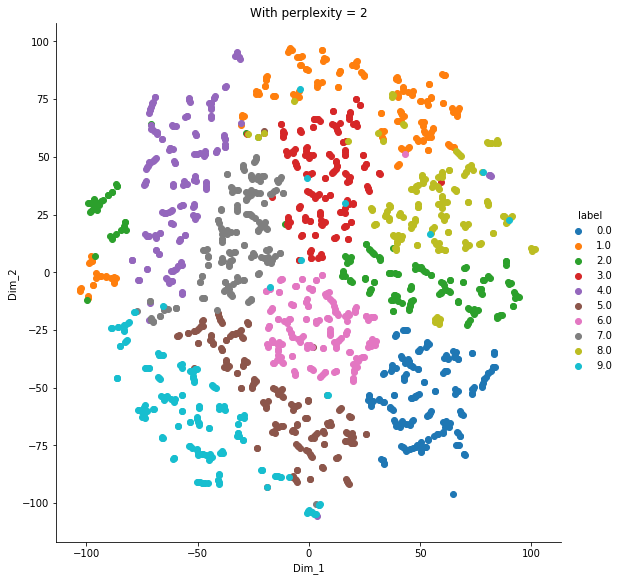

In [88]:
# With changed perplexity=2

model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data) 

# creating a new dataframe which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, np.array(Y).reshape(-1))).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

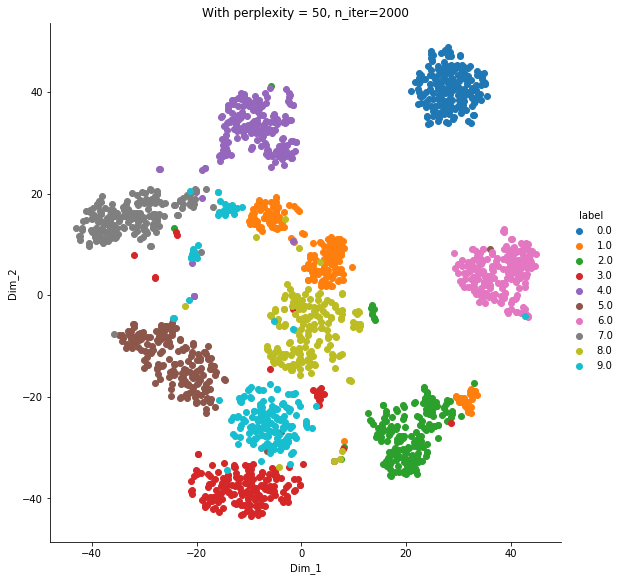

In [89]:
# With changed step=50(no. of iterations)

model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=2000)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, np.array(Y).reshape(-1))).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=2000')
plt.show()


    It is highly recommended to use another dimensionality reduction
    |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
    |  if the number of features is very high.

    The other key drawback is that it:

    “Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)”.

## TO-DO LIST

1) Download a data set having more than 200 features from UCI repository. And apply the PCA decomposition and SVD on it.

2) Since displaying data with a large number of dimensions is a handy task, after reducing thier dimensions visualize them 

3) There are other techniques used for dimensionality reduction. Can you name them ?

4) For very big data set we first reduced it through PCA, then we use T-SNE, can you tell the reason ?